# Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

# Explore Data

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

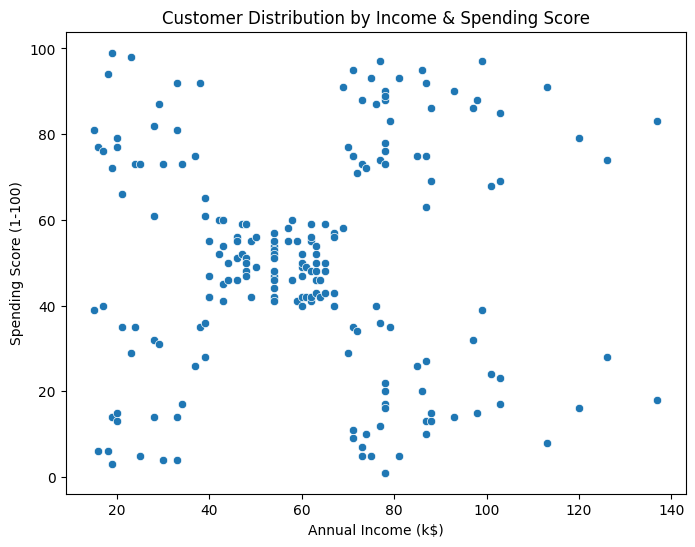

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Customer Distribution by Income & Spending Score")
plt.show()

# Scale Features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine Optimal Number of Clusters

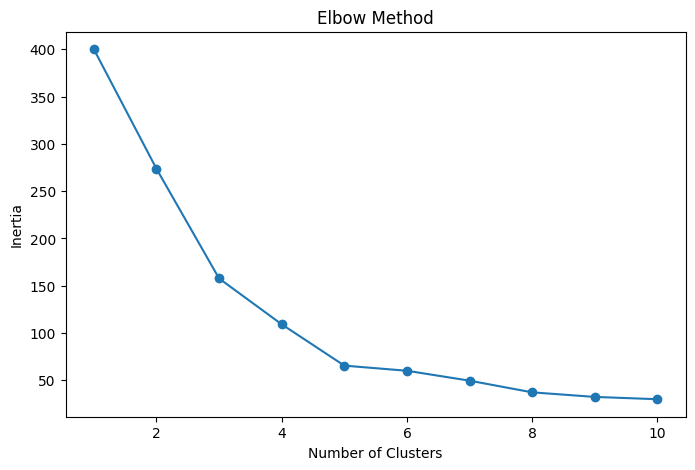

In [7]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [8]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Clusters: {k}, Silhouette Score: {score:.2f}")


Clusters: 2, Silhouette Score: 0.40
Clusters: 3, Silhouette Score: 0.47
Clusters: 4, Silhouette Score: 0.49
Clusters: 5, Silhouette Score: 0.55
Clusters: 6, Silhouette Score: 0.51
Clusters: 7, Silhouette Score: 0.50
Clusters: 8, Silhouette Score: 0.46
Clusters: 9, Silhouette Score: 0.46
Clusters: 10, Silhouette Score: 0.44


# Apply K-Means

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters

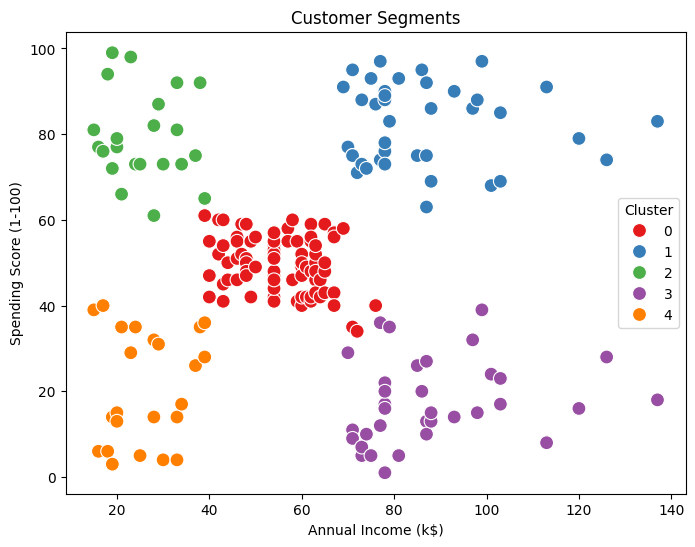

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100
)
plt.title("Customer Segments")
plt.show()

# Cluster Analysis

In [11]:
# Mean values of each cluster
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
